In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import  load_diabetes
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro,kstest,normaltest,skew

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

## 1.Problem Statement

to predict the price of diamods by using following information
independent features
carat	
cut	
color	
clarity	
depth	
table
x	
y	
z	
dependent variable 
price


## 2 Data gathering

In [2]:
df=pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
#df=df.drop("ID",axis=1)
#df

In [4]:
df.head(1).T

,0
carat,0.23
cut,Ideal
color,E
clarity,SI2
depth,61.5
table,55.0
price,326
x,3.95
y,3.98
z,2.43


## 3 EDA

### 3.1 carat

In [5]:
#df.info()
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [6]:
df['carat'].isna().sum()

0

### 3.2 cut 

In [7]:
#df.info()
df['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

In [8]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
df['cut'].value_counts().to_dict()

{'Ideal': 21551,
 'Premium': 13791,
 'Very Good': 12082,
 'Good': 4906,
 'Fair': 1610}

In [10]:
df['cut']=df['cut'].replace({'Ideal': 1,
 'Premium': 2,
 'Very Good': 3,
 'Good': 4,
 'Fair': 5})

In [11]:
df['cut']

0        1
1        2
2        4
3        2
4        4
        ..
53935    1
53936    4
53937    3
53938    2
53939    1
Name: cut, Length: 53940, dtype: int64

In [12]:
cut_lables={'Ideal': 1,
 'Premium': 2,
 'Very Good': 3,
 'Good': 4,
 'Fair': 5}

### 3.3 color 

In [13]:
#df.info()
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
df=pd.get_dummies(df,columns=['color'])
df

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,2,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,4,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,2,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,4,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0
53936,0.72,4,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0
53937,0.70,3,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0
53938,0.86,2,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0


In [15]:
#df.info()

### 3.4 clarity

In [16]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [17]:
df['clarity'].value_counts().to_dict()

{'SI1': 13065,
 'VS2': 12258,
 'SI2': 9194,
 'VS1': 8171,
 'VVS2': 5066,
 'VVS1': 3655,
 'IF': 1790,
 'I1': 741}

In [18]:
df['clarity']=df['clarity'].replace({'SI1': 1,
 'VS2': 2,
 'SI2': 3,
 'VS1': 4,
 'VVS2': 5,
 'VVS1': 6,
 'IF': 7,
 'I1': 8})

In [19]:
clarity_lables={'SI1': 1,
 'VS2': 2,
 'SI2': 3,
 'VS1': 4,
 'VVS2': 5,
 'VVS1': 6,
 'IF': 7,
 'I1': 8}

### 3.5depth

In [20]:
#df.info()
df['depth'].isna().sum()

0

### 3.6 tables

In [21]:
df['table'].isna().sum()

0

### 3.7 price

In [22]:
df['price'].isnull().sum()

0

In [23]:
df['x'].isna().sum()

0

In [24]:
df['y'].isnull().sum()

0

In [25]:
df['z'].isna().sum()

0

## 4 feature engineering

### 1.linearity

In [26]:
df.corr()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,0.134967,-0.155192,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054
cut,0.134967,1.000000,-0.092976,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323,-0.007903,0.004110,0.007697,-0.040155,0.010380,0.008836,0.036153
clarity,-0.155192,-0.092976,1.000000,-0.024337,-0.094350,-0.083125,-0.182734,-0.176540,-0.179684,-0.094134,-0.033996,0.027113,0.123186,-0.009055,-0.013890,-0.039235
depth,0.028224,0.218055,-0.024337,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.013566,-0.028713,-0.017741,0.002768,0.026037,0.022630,0.022543
table,0.181618,0.433405,-0.094350,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.008921,0.007172,-0.004906,-0.038815,0.011574,0.017967,0.037253
price,0.921591,0.053491,-0.083125,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.072473,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710
x,0.975094,0.125565,-0.182734,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.106127,-0.134213,-0.048021,-0.024593,0.095896,0.146522,0.164658
y,0.951722,0.121462,-0.176540,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.103999,-0.130136,-0.046707,-0.024479,0.093480,0.142895,0.160776
z,0.953387,0.149323,-0.179684,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.105216,-0.132210,-0.048803,-0.024582,0.095041,0.145276,0.164217
color_D,-0.112057,-0.007903,-0.094134,-0.013566,-0.008921,-0.072473,-0.106127,-0.103999,-0.105216,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,-0.126699,-0.088817


<Axes: >

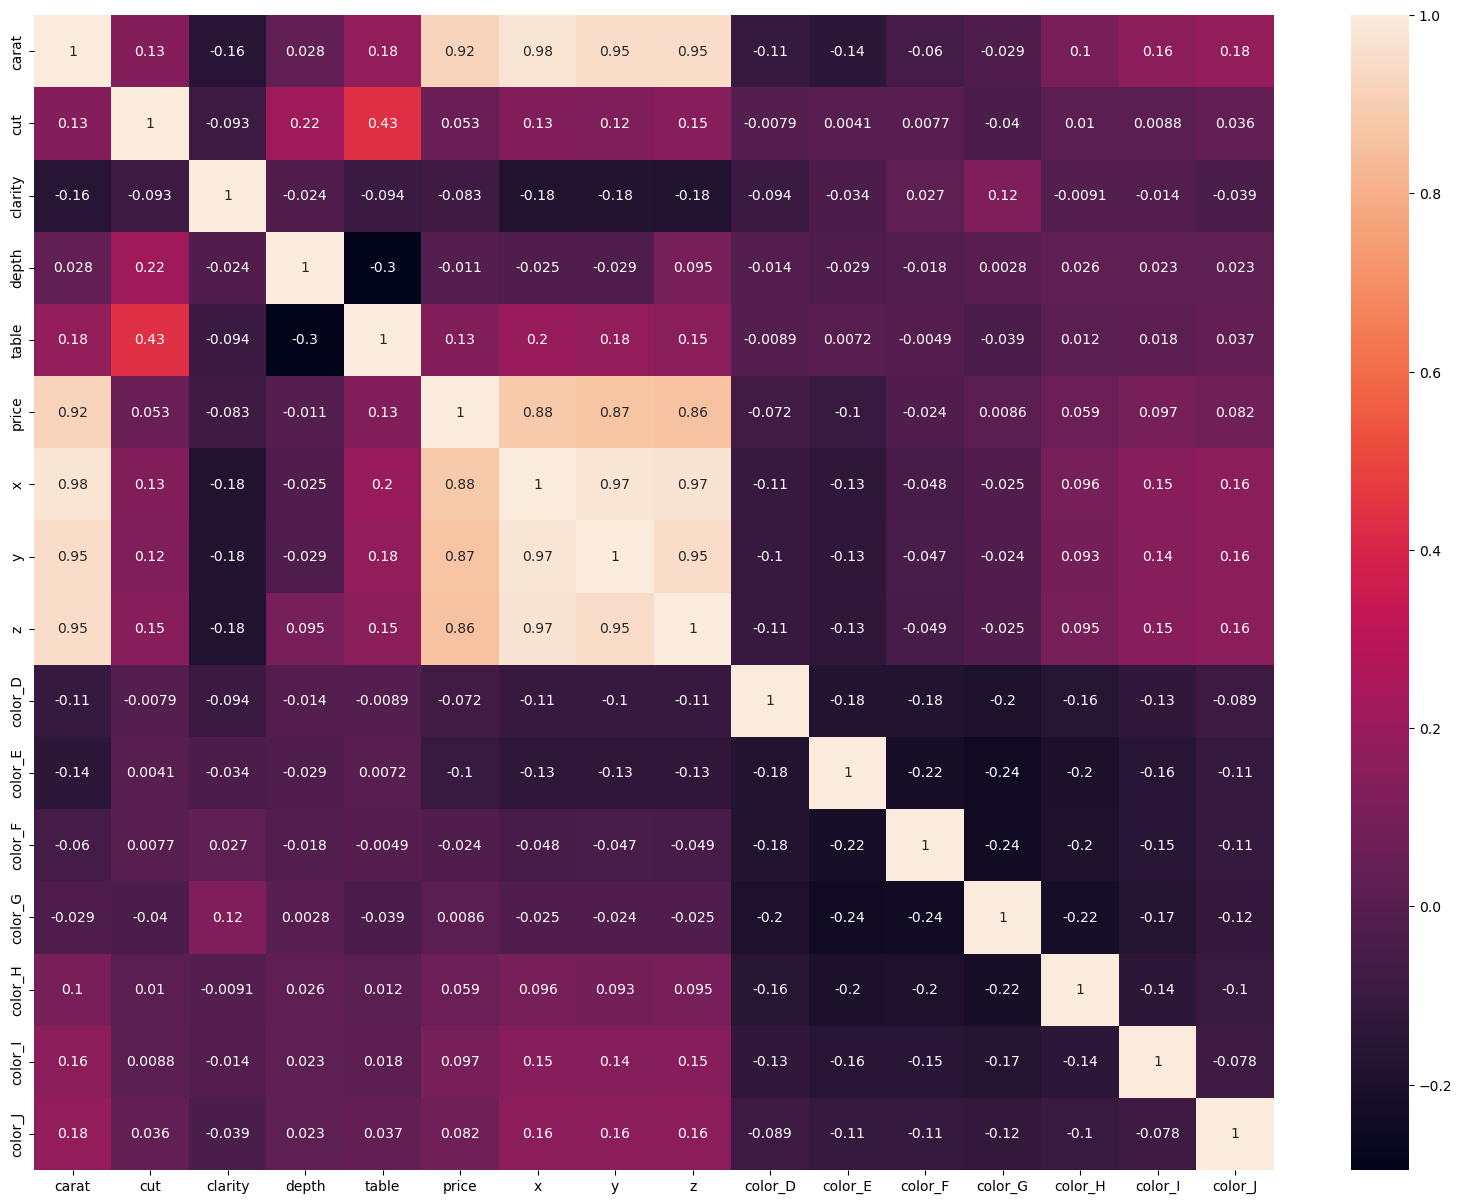

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)


<Axes: >

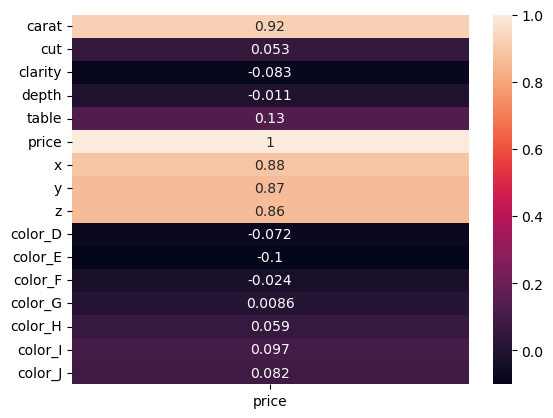

In [28]:
sns.heatmap(df.corr().iloc[:,[5]],annot=True)

### 2.vif

In [29]:
X=df.drop("price",axis=1)
y=df['price']

In [30]:
variance_inflation_factor(X.to_numpy(),0)

22.353184502858433

In [31]:
variance_inflation_factor(X.to_numpy(),5)

56.90514171072851

In [32]:
vif_list=[variance_inflation_factor(X.to_numpy(),i) for i in range(X.shape[1])]
vif_list

[22.353184502858433,
 1.475735462746612,
 1.0853580392680344,
 1.71142490114558,
 1.5784733844622116,
 56.90514171072851,
 20.46480414486301,
 23.53955467842649,
 767.8666982253812,
 1109.8966199526074,
 1082.1366203401476,
 1281.5329860398463,
 942.9820745105154,
 615.5479440090055,
 319.1709341744301]

## 5 model training

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)
x_train

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
30006,0.43,3,3,62.7,55.0,4.83,4.87,3.04,0,1,0,0,0,0,0
21473,1.53,2,1,61.7,59.0,7.31,7.40,4.54,0,0,0,1,0,0,0
35218,0.41,4,6,62.6,62.0,4.70,4.76,2.96,0,0,0,0,1,0,0
15159,1.04,3,2,62.3,54.0,6.49,6.55,4.06,0,0,0,1,0,0,0
1949,0.75,3,1,63.9,56.0,5.73,5.75,3.67,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49015,0.50,2,5,61.9,58.0,5.07,5.10,3.15,0,0,1,0,0,0,0
2693,0.90,4,2,63.8,55.0,6.16,6.07,3.90,0,0,0,0,0,1,0
8076,1.01,4,3,63.6,57.0,6.34,6.30,4.02,1,0,0,0,0,0,0
52981,0.71,3,5,62.5,56.0,5.65,5.68,3.54,0,0,0,0,1,0,0


### instancing the model

In [34]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [35]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
linear_reg.coef_

array([11227.91280797,  -189.8170948 ,    98.97875548,  -132.89418115,
         -41.1898372 , -1708.73878184,   404.02179303,    29.03110075,
         640.86166513,   507.65031924,   519.56765682,   432.7825459 ,
        -175.3925758 ,  -537.92310228, -1387.54650901])

In [37]:
linear_reg.intercept_

12813.00399354515

## 6 evalution of model

#### training data evalution

In [38]:
y_pred_train=linear_reg.predict(x_train)
y_pred_train

array([ 1080.86796028, 10144.74830043,   180.71769477, ...,
        5360.47328475,  2665.59456309,  3851.79357973])

In [39]:
mse=mean_squared_error(y_train,y_pred_train)
print("mean sqaured error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error: ",mae)

r2_value=r2_score(y_train,y_pred_train)
print("R sqaured value: ",r2_value)

n=x_train.shape[0]
k=x_train.shape[1]
adj_r2=1-((1-r2_value)*(n-1))/(n-k-1)
print("adjusted r2 values: ",adj_r2)

mean sqaured error:  1908871.59412722
root mean sqaured error:  1381.6191928774078
mean absolute error:  823.589972575995
R sqaured value:  0.8798769160860039
adjusted r2 values:  0.8798291749419546


#### testing data evalutions

In [40]:
y_pred=linear_reg.predict(x_test)

In [41]:
mse=mean_squared_error(y_test,y_pred)
print("mean sqaured error: ",mse)

rmse=np.sqrt(mse)
print("root mean sqaured error: ",rmse)

mae=mean_absolute_error(y_test,y_pred)
print("mean absolute error: ",mae)

r2_value=r2_score(y_test,y_pred)
print("R sqaured value: ",r2_value)

n=x_test.shape[0]
k=x_test.shape[1]
adj_r2=1-((1-r2_value)*(n-1))/(n-k-1)
print("adjusted r2 values: ",adj_r2)

mean sqaured error:  2005174.7001002033
root mean sqaured error:  1416.0419132568793
mean absolute error:  838.7668774621387
R sqaured value:  0.8744479010895747
adjusted r2 values:  0.8743314046474334


In [42]:
##Assumptions after training the model

### 3.normality of residuals

In [43]:
residuals=y_test -y_pred
residuals

46307     868.295775
67        639.345716
42455    -536.405606
25376     -78.570202
12336   -1125.759942
            ...     
3721      948.793787
43671     -72.373385
13552       5.045307
20142    -875.080416
24151    1518.324210
Name: price, Length: 16182, dtype: float64

#### visulations techniques(tools)

<Axes: xlabel='price', ylabel='Density'>

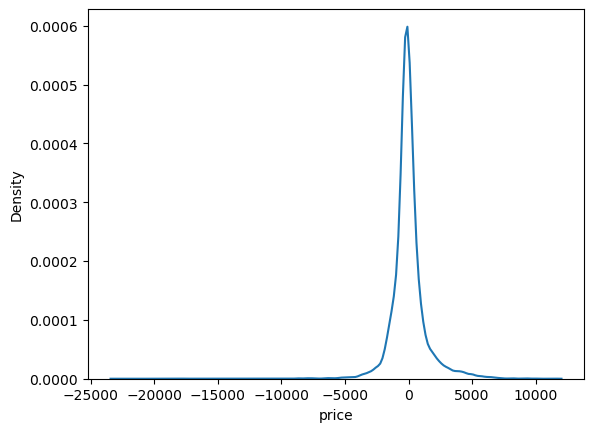

In [44]:
sns.kdeplot(residuals)

<Axes: xlabel='price', ylabel='Count'>

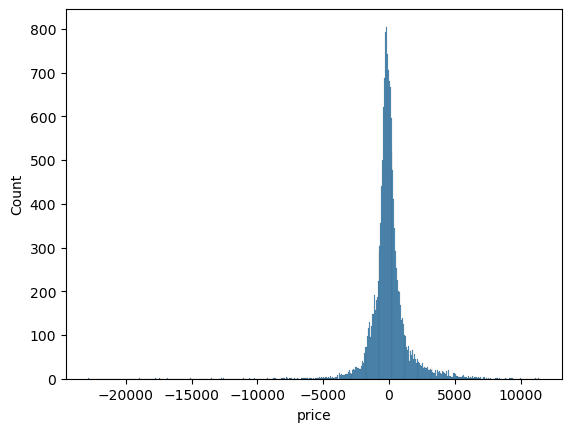

In [45]:
sns.histplot(residuals)

<Axes: xlabel='price', ylabel='Density'>

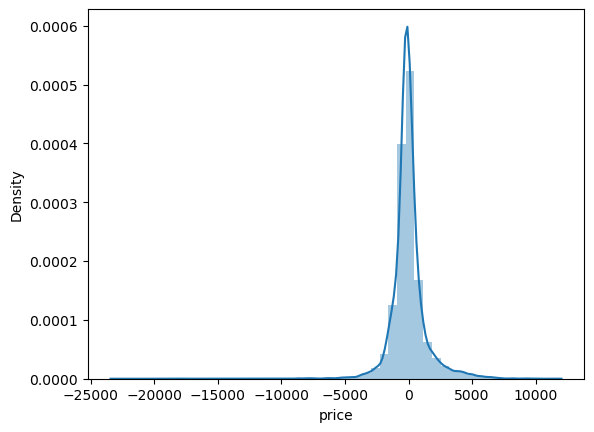

In [46]:
sns.distplot(residuals)

### 2QQ plot

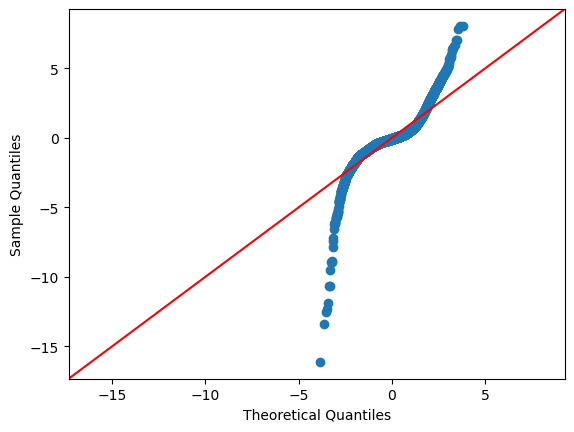

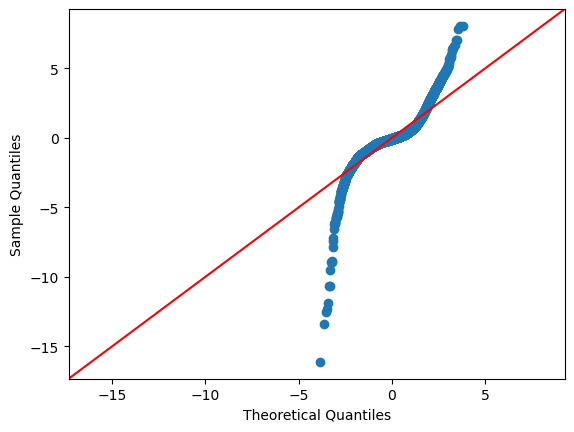

In [47]:
sm.qqplot(residuals,line='45',fit=True)

### 3hypothesis testing

### shapiro

In [48]:
_,p_val=shapiro(residuals)
print("p_val: ",p_val)
if p_val>0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
else:
    print("data is not noramally distributed ")
    print("alternate hypothesis is true")

p_val:  0.0
data is not noramally distributed 
alternate hypothesis is true


### kstest

In [49]:
_,p_val=kstest(residuals,'norm')
print("p_val: ",p_val)
if p_val>0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
else:
    print("data is not noramally distributed ")
    print("alternate hypothesis is true")

p_val:  0.0
data is not noramally distributed 
alternate hypothesis is true


### normaltest

In [50]:
_,p_val=normaltest(residuals)
print("p_val: ",p_val)
if p_val>0.05:
    print("data is normally distributed")
    print("null hypothesis is true")
else:
    print("data is not noramally distributed ")
    print("alternate hypothesis is true")

p_val:  0.0
data is not noramally distributed 
alternate hypothesis is true


### 4 skewness

In [51]:
mean=residuals.mean()
median=residuals.median()
skew=residuals.skew()
print("mean: ",mean)
print("median: ",median)
print("skew: ",skew)

if mean>median:
    print("data is postively skewwed")
    print("skew: ",skew)
elif mean<median:
    print("data is negetively skewwed")
    print("skew: ",skew)
else:
    print("symmetric data")
    print("skew: ",skew)

mean:  8.755576712514266
median:  -99.86862479673891
skew:  -0.28853361794753696
data is postively skewwed
skew:  -0.28853361794753696


In [52]:
x_train.head(1).T

,30006
carat,0.43
cut,3.00
clarity,3.00
depth,62.70
table,55.00
x,4.83
y,4.87
z,3.04
color_D,0.00
color_E,1.00


In [53]:
carat=0.43
cut=3.00
clarity=3.00
depth=62.70
table=55.00
x=4.83
y=4.87
z=3.04
color_D=0.00
color_E=1.00
color_F=0.00
color_G=0.00
color_H=0.00
color_I=0.00
color_J=0.00

In [54]:
carat=0.75
cut='Ideal'
clarity="SI2"
depth=62.70
table=55.00
x=4.83
y=4.87
z=3.04
color='F'
cut=cut_lables[cut]
clarity=clarity_lables[clarity]

In [55]:
color='color_' + color


In [56]:
x_train.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [57]:
def get_predicted_price():
    test_array=np.zeros((1,linear_reg.n_features_in_))
    test_array[0][0]=carat
    test_array[0][1]=cut
    test_array[0][2]=clarity
    test_array[0][3]=depth
    test_array[0][4]=table
    test_array[0][5]=x
    test_array[0][6]=y
    test_array[0][7]=z
    #test_array
    color_index=x_train.columns.tolist().index(color)
    test_array[0][color_index]=1
    predicted_price=linear_reg.predict(test_array)
    return predicted_price
get_predicted_price()


array([5065.35158602])

In [58]:
x_test[20:21]

,carat,cut,clarity,depth,table,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
32081,0.33,3,4,61.6,56.0,4.43,4.46,2.74,0,1,0,0,0,0,0


In [59]:
linear_reg.predict(x_test[20:21])[0]

671.186444389974

In [60]:
x_test[20:21].T

,32081
carat,0.33
cut,3.00
clarity,4.00
depth,61.60
table,56.00
x,4.43
y,4.46
z,2.74
color_D,0.00
color_E,1.00


In [61]:
carat=0.33
cut='Ideal'
clarity="I1"
depth=61.60
table=56.00
x=4.43
y=4.46
z=2.74
color="D"
column_name=X.columns.tolist()
cut=cut_lables[cut]
clarity=clarity_lables[clarity]
color="color_"+color
color_index=column_name.index(color)

test_array=np.zeros([1,linear_reg.n_features_in_])
test_array[0,0]=carat
test_array[0,1]=cut
test_array[0,2]=clarity
test_array[0,3]=depth
test_array[0,4]=table
test_array[0,5]=x
test_array[0,6]=y
test_array[0,7]=z
test_array[0,color_index]=1

predicted_price=np.round(linear_reg.predict(test_array)[0],3)
predicted_price

1579.947

In [62]:
with open("Daimond_price_model.pkl",'wb') as f:
    pickle.dump(linear_reg,f)

In [63]:
project_data={"Cut":cut_lables,"Clarity":clarity_lables,"Column Name":column_name}

In [64]:
with open("proj_data.json",'w') as f:
    json.dump(project_data,f)